In [1]:
#Using the petrol consumption dataset, analyze how is the petrol consumption varying with respect to the other factors.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

In [8]:
pc=pd.read_csv(r"C:\Users\c\Downloads\petrol_consumption.csv") #r stands for read data in raw format.We can use or // or \

In [12]:
pc.shape

(48, 5)

In [13]:
pc.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


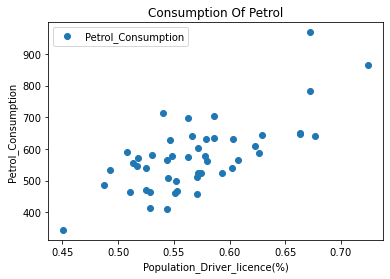

In [18]:
pc.plot(x='Population_Driver_licence(%)', y='Petrol_Consumption', style='o')
plt.title('Consumption Of Petrol')
plt.xlabel('Population_Driver_licence(%)')
plt.ylabel('Petrol_Consumption')
plt.show()

In [20]:
print(pc.keys())

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')


In [9]:
pc.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
pc['Petrol_Consumption'] = pc.target

In [10]:
#Check for missing / null values. if any remove/ replace .
pc.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

C:\Users\C\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


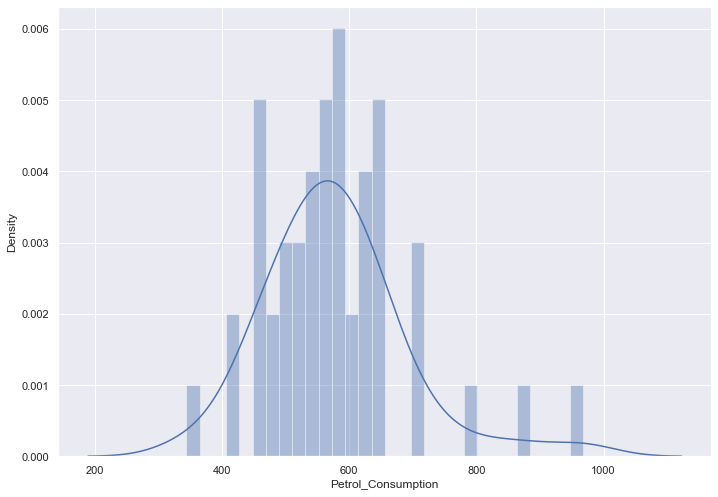

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(pc['Petrol_Consumption'], bins = 30)
plt.show()

<AxesSubplot:>

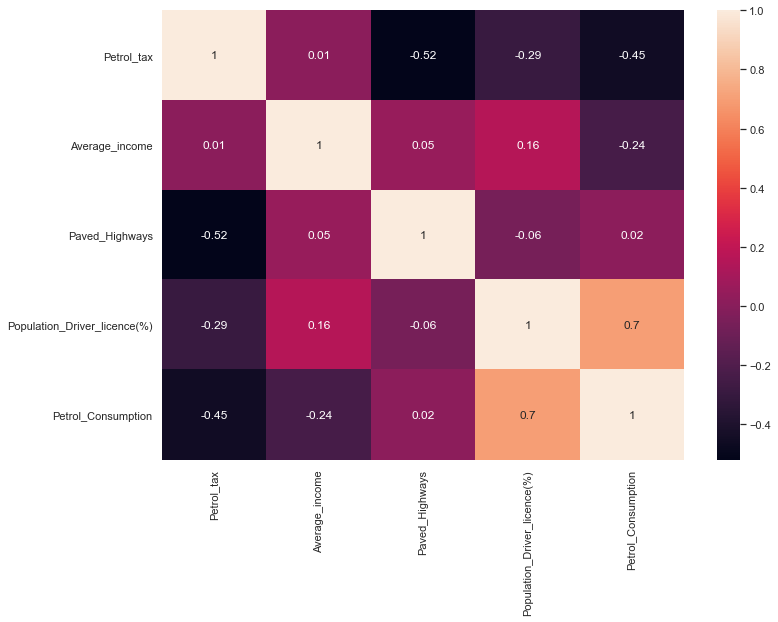

In [28]:
correlation_matrix = pc.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
#the correlation co-efficient ranges from -1 to 1

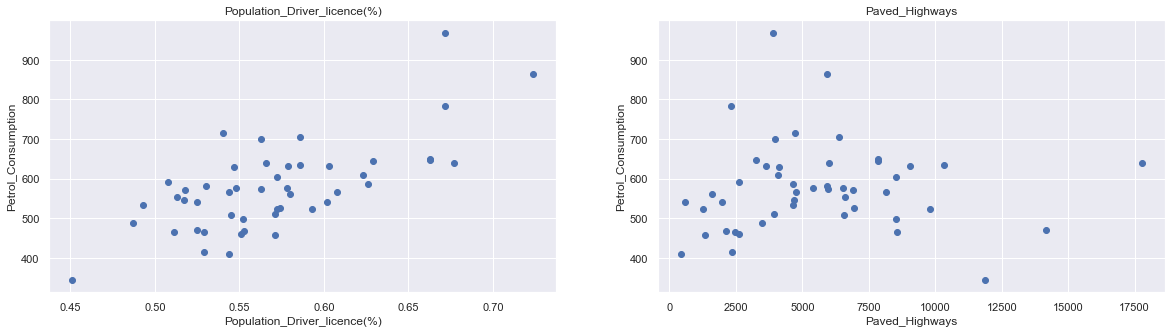

In [38]:
plt.figure(figsize=(20, 5))
features = ['Population_Driver_licence(%)','Paved_Highways']
target = pc['Petrol_Consumption']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = pc[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Petrol_Consumption')

In [42]:
X = pd.DataFrame(np.c_[pc['Population_Driver_licence(%)'], pc['Paved_Highways']], columns = ['Population_Driver_licence(%)','Paved_Highways'])
Y = pc['Petrol_Consumption']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(38, 2)
(10, 2)
(38,)
(10,)


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [47]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 77.90515946684219
R2 score is 0.5128520905066849


The model performance for testing set
--------------------------------------
RMSE is 82.9530543030917
R2 score is 0.3513561891509178
